<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/Algorithm/BJ/%ED%9A%8C%EC%82%AC_%EB%AC%B8%ED%99%94_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회사 문화 1

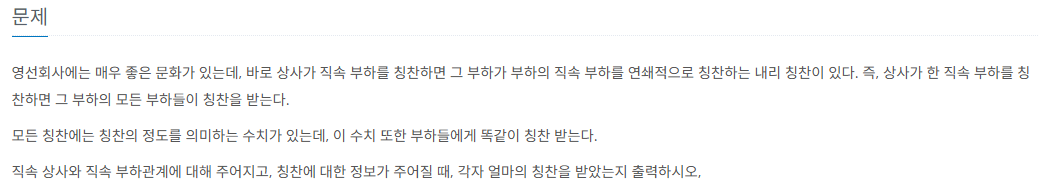

## 입력 출력 및 예제


* 입력

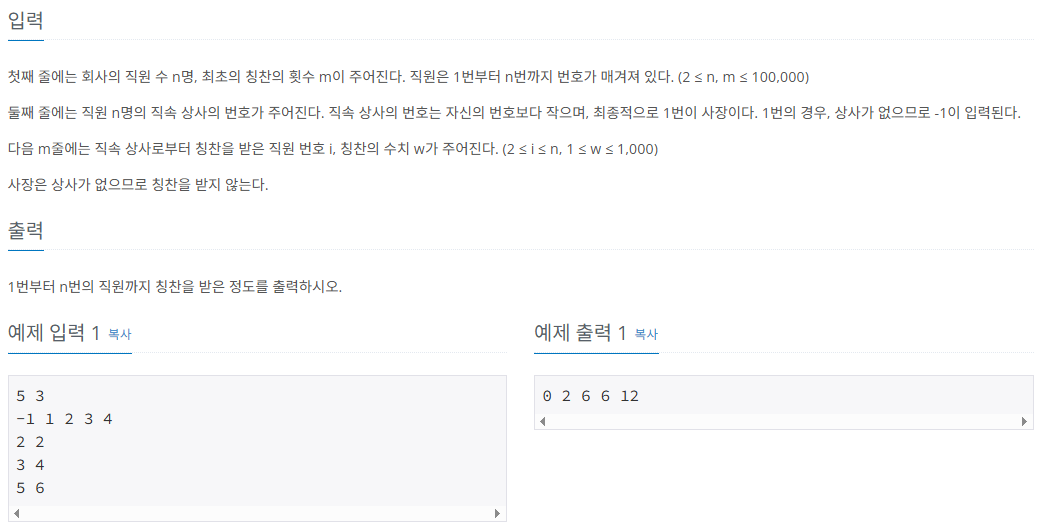

* 출력

* 예제

## 구상

-


## 코드

In [ ]:
# 시간 초과

from collections import deque


n, m = map(int,input().split())
parent = list(map(int,input().split()))
praise = []

for _ in range(m):
    praise.append(tuple(map(int,input().split())))

tree = [[] for _ in range(n+1)]

for i in range(n): # range를 (1,n) 으로 설정하면 됐는데..
    if parent[i] != -1:
        tree[parent[i]].append(i+1)

result = [0 for i in range(n+1)]

for n, w in praise:
    queue = deque([n])
    while queue:
        p = queue.pop()
        result[p] += w
        for c in tree[p]:
            queue.append(c)

for i in result[1:]:
    print(i,end= ' ')


5 3
-1 1 2 3 4
2 2
3 4
5 6
0 2 6 6 12 

In [ ]:
# GPT
from collections import deque

n, m = map(int, input().split())
parent = list(map(int, input().split()))  # parent[0] = -1, parent[i] = i+1번의 상사

tree = [[] for _ in range(n + 1)]
for i in range(2, n + 1):
    p = parent[i - 1]
    tree[p].append(i)

add = [0] * (n + 1)
for _ in range(m):
    i, w = map(int, input().split())
    add[i] += w

ans = add[:]  # ans에 누적 전파 결과를 만들 것 # 힙 구조의 보장이 있으므로

q = deque([1])  # 사장 1번부터
while q:
    u = q.popleft() # pop 도 가능
    for v in tree[u]:
        ans[v] += ans[u]   # 부모가 받은 칭찬을 그대로 자식에게 누적
        q.append(v)

print(*ans[1:])


[0, 0, 0, 0, 0, 0]

In [ ]:
# 친구 코드

n, m = map(int, input().split())
nums = [0] + list(map(int, input().split()))
dp = [0] * (n+1)

for i in range(m):
    a, b = map(int, input().split())
    dp[a] += b

for i in range(2, n+1):
    dp[i] += dp[nums[i]]

print(*dp[1:])

### 메모
핵심 아이디어 (정석)

1. add[i] = i가 “직접” 받은 칭찬 점수(여러 번 받으면 누적)만 먼저 모아둔다.

2. 트리를 딱 한 번 위→아래로 돌면서
ans[child] += ans[parent] 형태로 누적 전파한다.

3. 즉, “m번 전파”가 아니라 “전파는 1번”만 한다.


*